# #**VeReMi: A Dataset for Comparable Evaluation of Misbehavior Detection in VANETs**

About Dataset
The VeReMi dataset is created to assess the effectiveness of misbehavior detection methods in Vehicular Ad-HocNetworks (VANETs). It comprises message logs from onboard units, accompanied by a labeled ground truth generated from a simulated environment. The dataset includes malicious messages that cause incorrect application behavior, which the misbehavior detection mechanisms aim to prevent. The initial release of the VeReMidataset contains simple attacks, but it seeks to be a starting point for more complex attacks. The message logs of each vehicle contain GPS data (labeled as type=2) about the local car and Basic Safety Messages (BSM) (labeled as type=3) received from other vehicles via Dedicated Short-Range Communications (DSRC).
The VeReMi dataset has two primary objectives. Firstly, it serves as a benchmark for evaluating the performance of misbehavior detection mechanisms on a city-wide scale. Secondly, it saves computational resources typically required to run VEINS frequently. The VeReMi dataset contains different density levels, attacks, and attacker densities. VeReMi-extension, or VeReMi, is a dataset created to test and compare different methods of identifying VANET activity. The VeReMi dataset is an invaluable resource for researchers interested in evaluating and enhancing the effectiveness of misbehavior detection mechanisms for VANETs.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/vmi-mini/mini_vermi.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,type,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,...,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack,attack_type
0,0,0,3,27371.216284,981.098535,908.497891,3.826423,3.964059,-17.723786,-2.154895,...,-0.248402,-0.177659,0.000784,1.114785e-03,-0.971331,-0.237732,44.022409,33.840519,0,RandomSpeedOffset
1,1,1,3,52060.561117,1213.025174,984.277524,4.477449,4.459375,14.504808,2.605276,...,-0.653850,-0.117125,0.000001,1.847528e-07,0.992578,0.121610,2.560114,8.414909,0,DataReplay
2,2,2,3,28156.319142,140.514133,944.338854,2.965184,3.066191,-0.346027,4.671520,...,0.333247,-4.486889,0.000448,6.050771e-03,0.256103,0.966649,15.915074,9.636057,1,DoSDisruptive
3,3,3,3,28671.375689,558.005547,327.316562,4.934159,5.037039,11.792797,4.028876,...,-0.030639,-0.010265,0.000066,2.237617e-05,0.954113,0.299446,2.854203,6.203941,1,RandomSpeedOffset
4,4,4,2,53612.000000,689.179631,547.143780,3.327547,3.374621,3.887137,-8.732709,...,-1.829939,4.111129,0.000028,6.361425e-05,0.360402,-0.932797,5.648109,19.951521,0,DoS


In [ ]:
df.drop(['Unnamed: 0', 'type','attack_type',"Unnamed: 0.1"],axis=1,inplace=True)

In [ ]:
df.shape


(1000000, 18)

In [ ]:
df.head()

,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack
0,27371.216284,981.098535,908.497891,3.826423,3.964059,-17.723786,-2.154895,-0.024182,-0.017303,-0.248402,-0.177659,0.000784,1.114785e-03,-0.971331,-0.237732,44.022409,33.840519,0
1,52060.561117,1213.025174,984.277524,4.477449,4.459375,14.504808,2.605276,-0.008523,-0.001531,-0.653850,-0.117125,0.000001,1.847528e-07,0.992578,0.121610,2.560114,8.414909,0
2,28156.319142,140.514133,944.338854,2.965184,3.066191,-0.346027,4.671520,-0.000469,0.006336,0.333247,-4.486889,0.000448,6.050771e-03,0.256103,0.966649,15.915074,9.636057,1
3,28671.375689,558.005547,327.316562,4.934159,5.037039,11.792797,4.028876,0.022346,0.007632,-0.030639,-0.010265,0.000066,2.237617e-05,0.954113,0.299446,2.854203,6.203941,1
4,53612.000000,689.179631,547.143780,3.327547,3.374621,3.887137,-8.732709,0.000090,-0.000203,-1.829939,4.111129,0.000028,6.361425e-05,0.360402,-0.932797,5.648109,19.951521,0


All contineous features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   rcvTime      1000000 non-null  float64
 1   pos_0        1000000 non-null  float64
 2   pos_1        1000000 non-null  float64
 3   pos_noise_0  1000000 non-null  float64
 4   pos_noise_1  1000000 non-null  float64
 5   spd_0        1000000 non-null  float64
 6   spd_1        1000000 non-null  float64
 7   spd_noise_0  1000000 non-null  float64
 8   spd_noise_1  1000000 non-null  float64
 9   acl_0        1000000 non-null  float64
 10  acl_1        1000000 non-null  float64
 11  acl_noise_0  1000000 non-null  float64
 12  acl_noise_1  1000000 non-null  float64
 13  hed_0        1000000 non-null  float64
 14  hed_1        1000000 non-null  float64
 15  hed_noise_0  1000000 non-null  float64
 16  hed_noise_1  1000000 non-null  float64
 17  attack       1000000 non-null  int64  
dtypes: 

Dtype - Float

In [ ]:
df.describe()

,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,38561.039085,533.006627,660.539242,4.059815,4.060259,1.209786,1.840178,0.000031,-0.000029,0.042562,0.031694,0.000808,0.000990,-0.066241,0.034933,13.547448,13.343102,0.453017
std,12427.328612,411.754000,317.491608,17.434329,17.434116,9.362433,9.750553,0.011577,0.012711,0.942116,1.195288,0.002515,0.002570,0.641143,0.748231,21.768244,22.141533,0.497788
min,25207.000000,-3130.896807,-1739.375206,0.000000,0.000000,-27.270269,-27.113309,-0.095760,-0.087359,-4.499848,-4.499985,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,27158.170825,195.321425,387.718896,3.489455,3.491414,-2.365683,-3.904785,-0.002352,-0.004013,-0.164600,-0.204900,0.000005,0.000005,-0.654043,-0.774219,3.931695,3.525807,0.000000
50%,28596.814238,274.534172,719.361003,3.990375,3.990698,0.000073,0.000371,0.000000,0.000000,0.000074,0.000103,0.000065,0.000067,-0.024453,0.055592,9.327842,8.210772,0.000000
75%,51932.714884,901.750868,905.306091,4.491474,4.491825,4.510655,7.813991,0.002447,0.003939,0.213831,0.305158,0.000456,0.000756,0.215629,0.847202,17.356359,17.129547,1.000000
max,54197.000000,2998.057310,3125.380070,9970.716907,9970.727602,39.999163,39.999805,0.088609,0.095331,4.503902,4.501374,0.088258,0.101479,1.000000,1.000000,5577.485978,5576.778829,1.000000


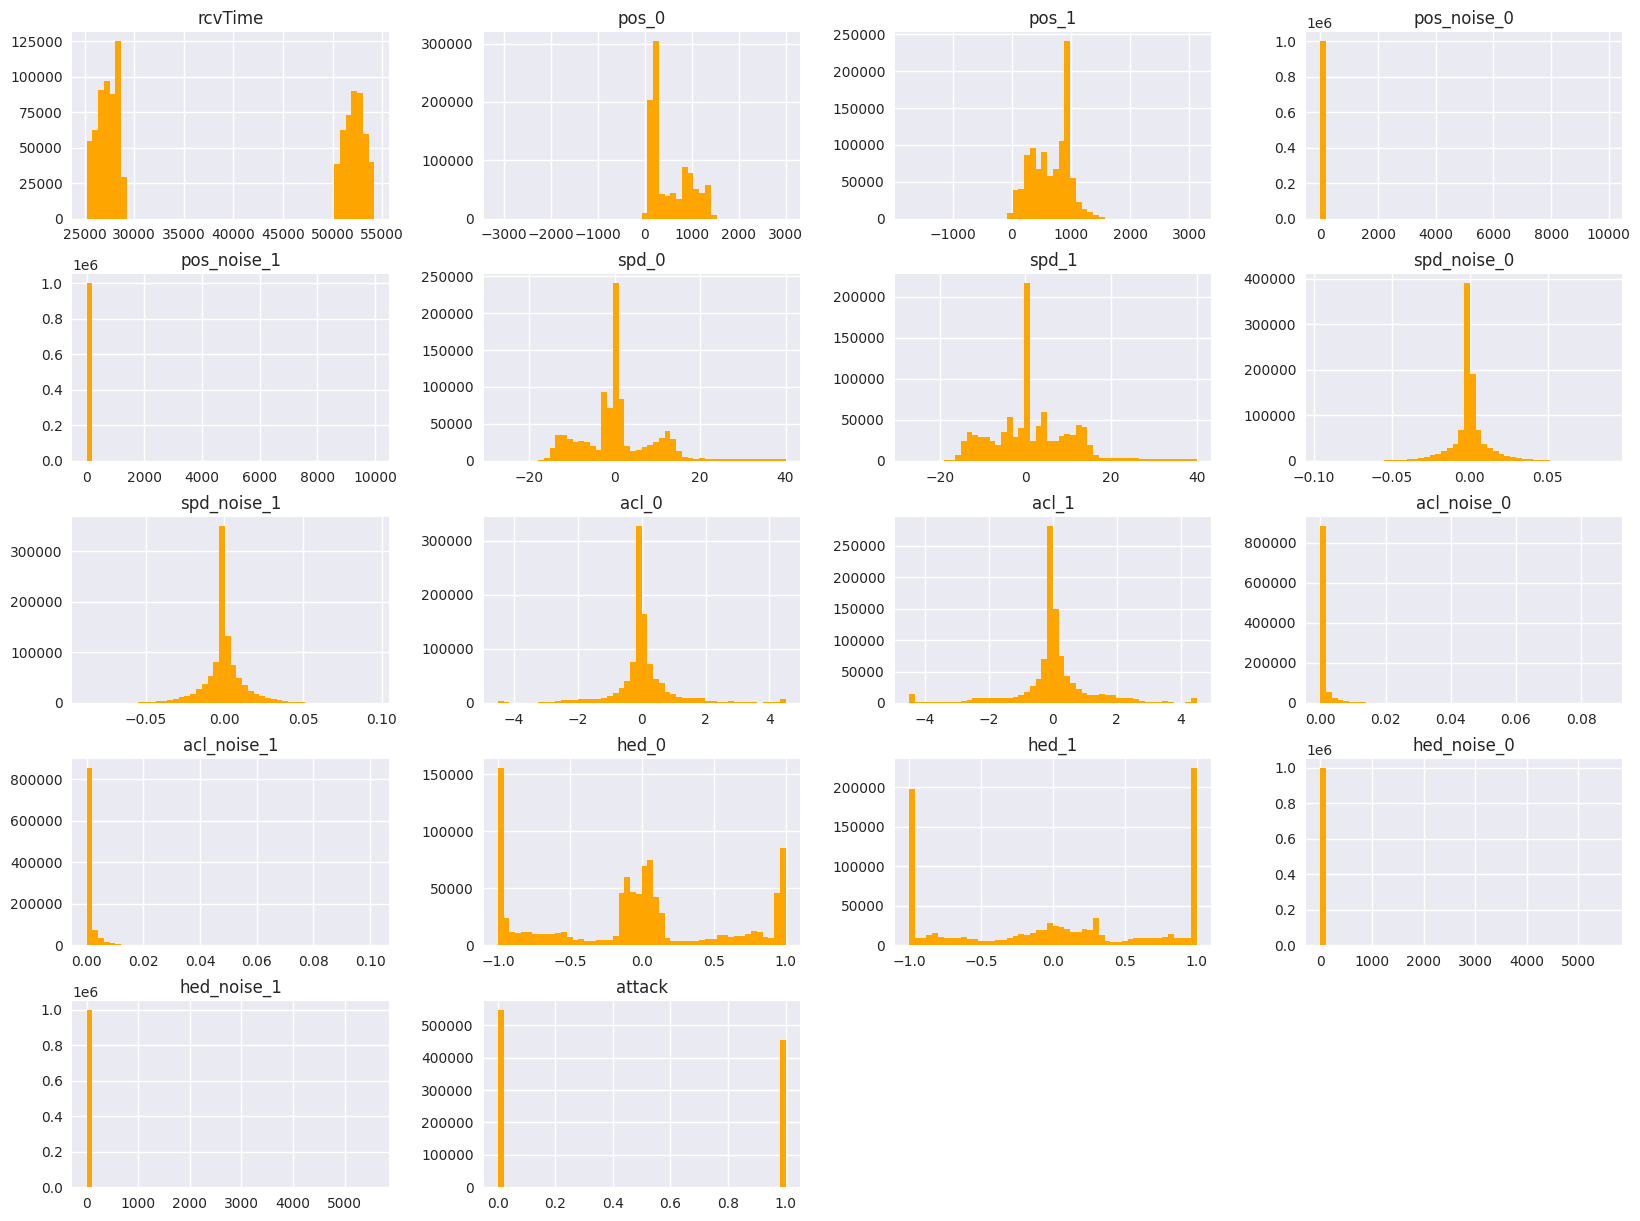

In [ ]:
## Plot desnity plot for all features
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [ ]:
df.isna().sum()

rcvTime        0
pos_0          0
pos_1          0
pos_noise_0    0
pos_noise_1    0
spd_0          0
spd_1          0
spd_noise_0    0
spd_noise_1    0
acl_0          0
acl_1          0
acl_noise_0    0
acl_noise_1    0
hed_0          0
hed_1          0
hed_noise_0    0
hed_noise_1    0
attack         0
dtype: int64

No null value

<Axes: >

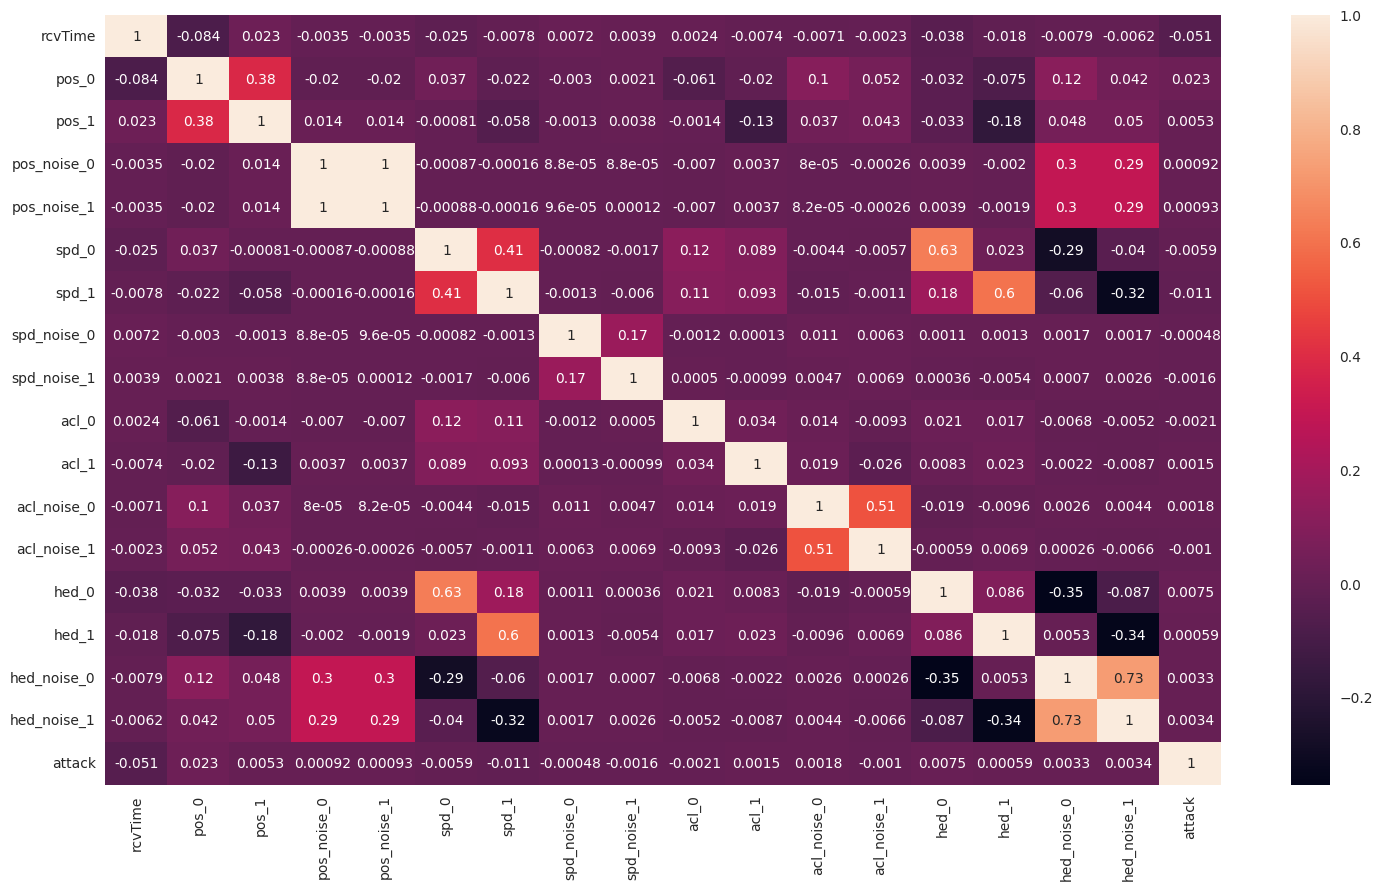

In [ ]:
## Check for multicollinearity
plt.figure(figsize=(18,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
x,y=train_test_split(df,test_size=0.10,random_state=2529)

In [ ]:
#  'pos_noise_0', 'pos_noise_1','acl_noise_0', 'acl_noise_1',  'hed_noise_0',
#        'hed_noise_1'
X=df[[ 'rcvTime','pos_0', 'pos_1'  , 'spd_0', 'spd_1', 'spd_noise_0', 'spd_noise_1', 'acl_0',
       'acl_1','hed_0', 'hed_1']]
y=df['attack']

In [ ]:
X.shape

(1000000, 11)

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.36,random_state=2529,stratify=y)

In [ ]:
y_train.value_counts(),y_test.value_counts()

(attack
 0    350069
 1    289931
 Name: count, dtype: int64,
 attack
 0    196914
 1    163086
 Name: count, dtype: int64)

In [ ]:
## Feature Selection based on correlaltion
X_train.corr()

,rcvTime,pos_0,pos_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,hed_0,hed_1
rcvTime,1.000000,-0.083557,0.022040,-0.024746,-0.005806,0.006660,0.003917,0.002537,-0.006229,-0.037496,-0.017466
pos_0,-0.083557,1.000000,0.384083,0.037135,-0.023621,-0.001718,0.001694,-0.060314,-0.018439,-0.031826,-0.076543
pos_1,0.022040,0.384083,1.000000,-0.000788,-0.057078,-0.000190,0.003552,-0.001727,-0.132590,-0.033594,-0.178460
spd_0,-0.024746,0.037135,-0.000788,1.000000,0.407678,-0.001110,-0.000914,0.119928,0.088820,0.631666,0.022837
spd_1,-0.005806,-0.023621,-0.057078,0.407678,1.000000,-0.000815,-0.004315,0.105808,0.092906,0.175445,0.601081
spd_noise_0,0.006660,-0.001718,-0.000190,-0.001110,-0.000815,1.000000,0.169392,-0.001479,0.000636,-0.000312,0.001484
spd_noise_1,0.003917,0.001694,0.003552,-0.000914,-0.004315,0.169392,1.000000,0.001246,-0.001829,0.000349,-0.004935
acl_0,0.002537,-0.060314,-0.001727,0.119928,0.105808,-0.001479,0.001246,1.000000,0.033717,0.020490,0.016490
acl_1,-0.006229,-0.018439,-0.132590,0.088820,0.092906,0.000636,-0.001829,0.033717,1.000000,0.007559,0.023466
hed_0,-0.037496,-0.031826,-0.033594,0.631666,0.175445,-0.000312,0.000349,0.020490,0.007559,1.000000,0.086524


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<Axes: >

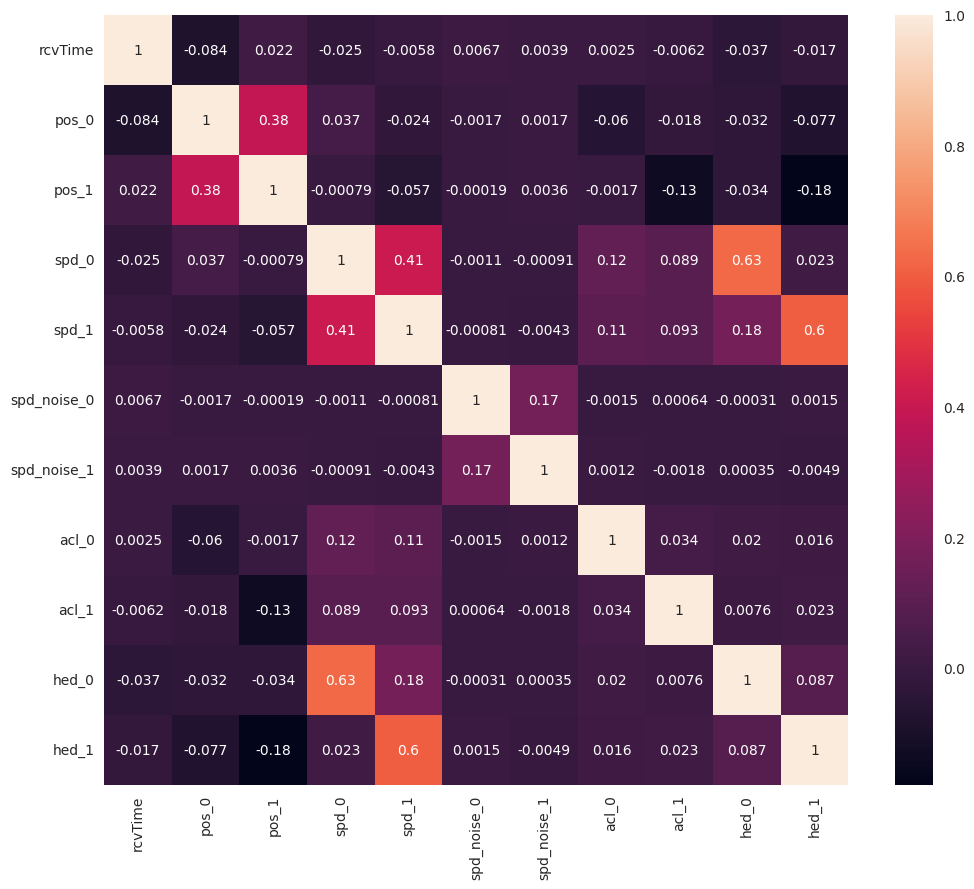

In [ ]:
## Check for multicollinearity
plt.figure(figsize=(12,10))

corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [ ]:
corr_features

set()

In [ ]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((640000, 11), (360000, 11))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
mm=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05
mean,-9.183876e-16,-1.896372e-16,9.110490e-16,7.038814e-18,1.676437e-18,3.663736e-19,4.241052e-18,-2.046696e-17,-8.981704e-18,-1.512679e-17,-8.809620e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.073942e+00,-8.641236e+00,-7.562942e+00,-3.037546e+00,-2.860237e+00,-8.270887e+00,-6.840518e+00,-4.828438e+00,-3.791940e+00,-1.455576e+00,-1.383519e+00
25%,-9.172267e-01,-8.208023e-01,-8.609993e-01,-3.821270e-01,-5.888681e-01,-2.057853e-01,-3.127717e-01,-2.196410e-01,-1.964225e-01,-9.178672e-01,-1.079819e+00
50%,-8.014736e-01,-6.277303e-01,1.883125e-01,-1.296765e-01,-1.892978e-01,-4.581058e-03,1.642999e-03,-4.509592e-02,-2.474998e-02,6.473687e-02,2.733677e-02
75%,1.076481e+00,8.954537e-01,7.710647e-01,3.545767e-01,6.128354e-01,2.076481e-01,3.124165e-01,1.830658e-01,2.299328e-01,4.410007e-01,1.085657e+00
max,1.258687e+00,5.774084e+00,7.368402e+00,4.135476e+00,3.911042e+00,7.644426e+00,7.438140e+00,4.742452e+00,3.743431e+00,1.662949e+00,1.289962e+00


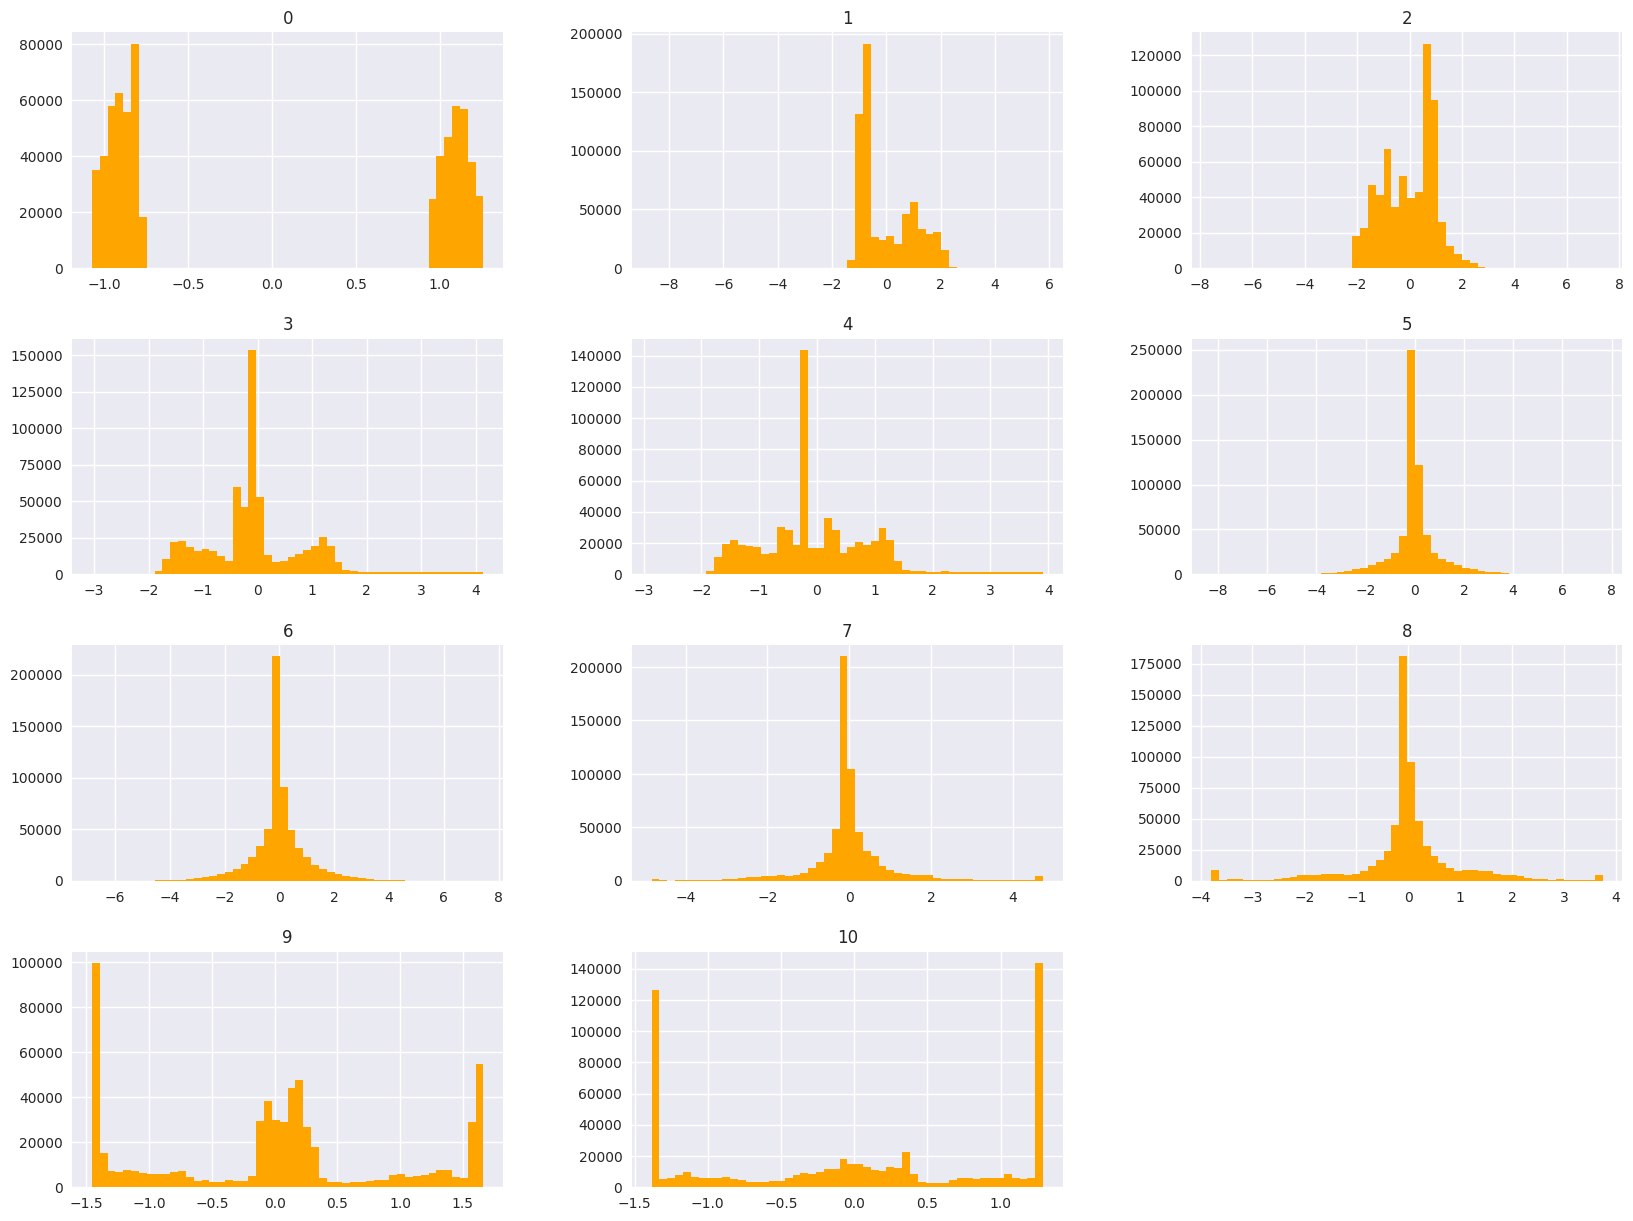

In [ ]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(X_train_scaled).hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [ ]:
pd.DataFrame(X_test_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,0.001343,-0.003056,-0.004100,-0.001898,-0.001942,-0.005271,-0.001817,0.000192,0.004714,0.001110,-0.000228
std,1.000025,0.998670,1.000906,0.995347,0.998689,0.998341,1.002262,1.004064,1.001713,0.999194,1.000530
min,-1.074097,-8.895134,-7.179590,-2.901834,-2.968720,-7.681632,-6.876818,-4.828493,-3.791938,-1.455576,-1.383519
25%,-0.916661,-0.820877,-0.861303,-0.381585,-0.591201,-0.210812,-0.317437,-0.221190,-0.196273,-0.913144,-1.085315
50%,-0.801040,-0.629777,0.176141,-0.129676,-0.189298,-0.004581,0.001643,-0.045097,-0.024749,0.066950,0.027811
75%,1.076483,0.891269,0.766132,0.346067,0.610219,0.204878,0.310843,0.180587,0.231732,0.438620,1.085809
max,1.258123,5.982748,7.764555,4.135474,3.910997,7.644426,7.507793,4.741559,3.742890,1.662949,1.289962


Text(0.5, 1.0, 'X_train After Scaling')

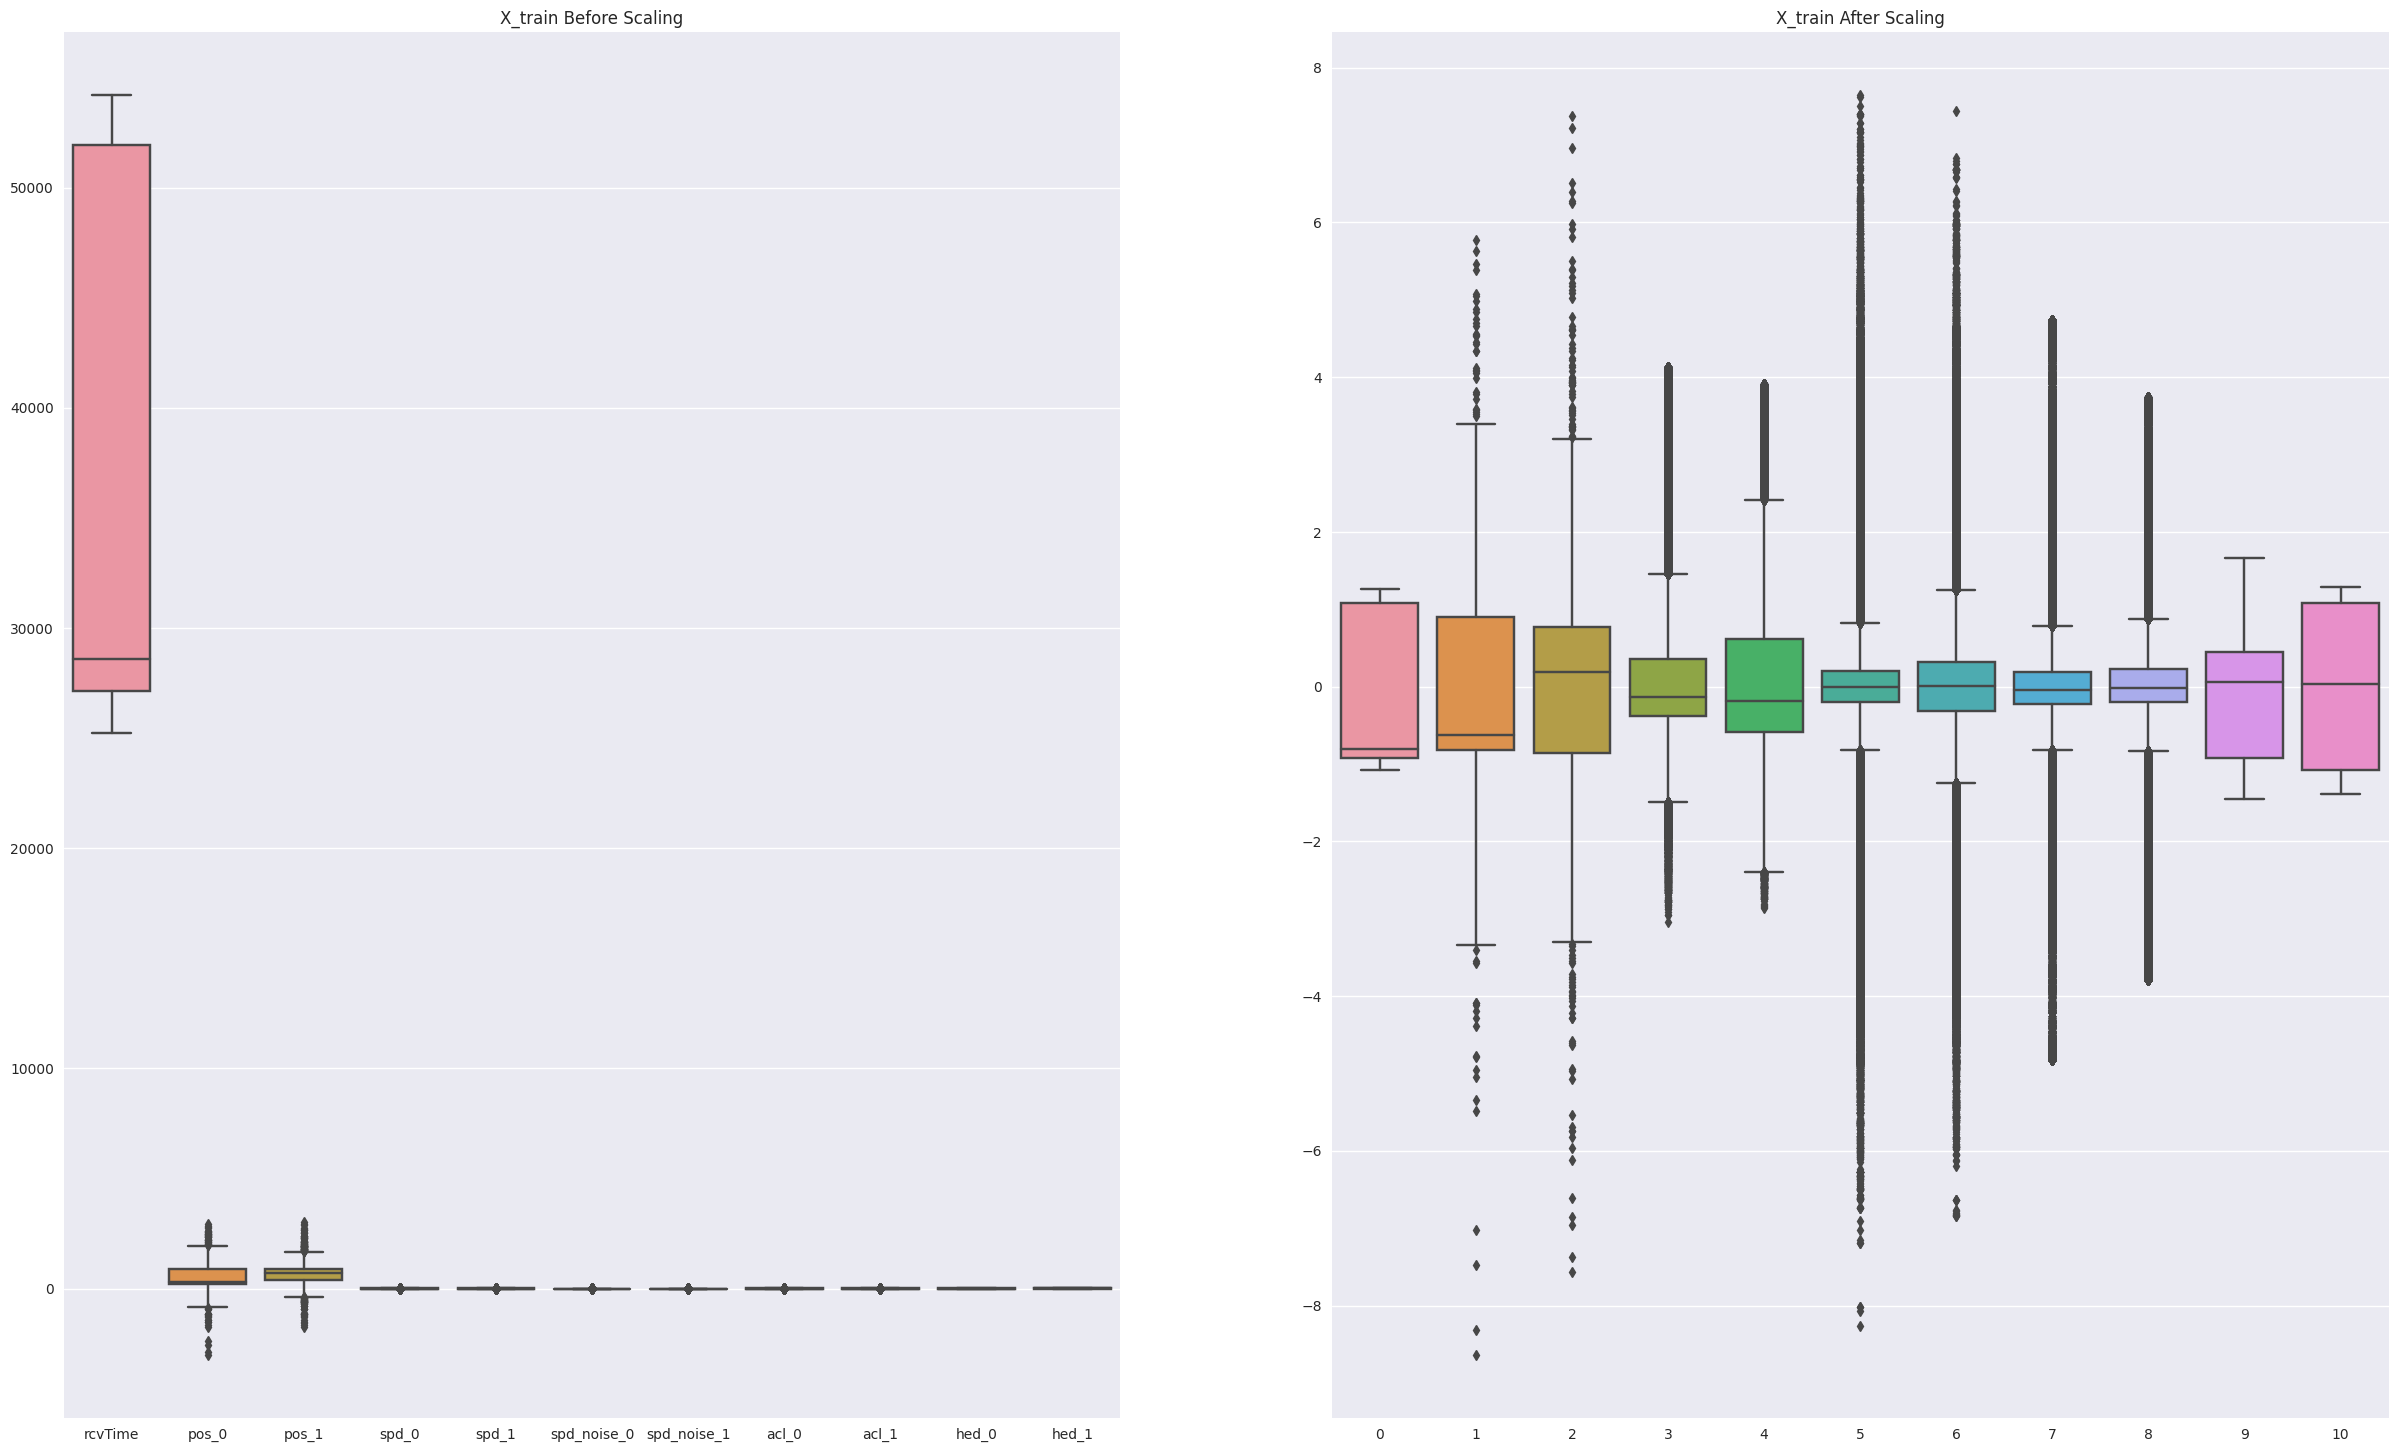

In [ ]:
plt.subplots(figsize=(30, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

.


‎

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
models={

    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "Gausian":GaussianNB(),
    "knn"    :KNeighborsClassifier()


}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5467
- F1 score: 0.3978
- Precision: 0.4876
- Recall: 0.0141
- Roc Auc Score: 0.5009
----------------------------------
Model performance for Test set
- Accuracy: 0.5467
- F1 score: 0.3980
- Precision: 0.4890
- Recall: 0.0144
- Roc Auc Score: 0.5010


Decision Tree
Model performance for Training set
- Accuracy: 0.9747
- F1 score: 0.9746
- Precision: 0.9982
- Recall: 0.9458
- Roc Auc Score: 0.9722
----------------------------------
Model performance for Test set
- Accuracy: 0.5582
- F1 score: 0.5578
- Precision: 0.5127
- Recall: 0.5011
- Roc Auc Score: 0.5533


Random Forest
Model performance for Training set
- Accuracy: 0.9747
- F1 score: 0.9747
- Precision: 0.9753
- Recall: 0.9686
- Roc Auc Score: 0.9741
----------------------------------
Model performance for Test set
- Accuracy: 0.5802
- F1 score: 0.5765
- Precision: 0.5419
- Recall: 0.4742
- Roc Auc Score: 0.5711


Gradient Boost
Model performance for Training se

**K nearest neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=30,algorithm='ball_tree')
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=30)

In [ ]:

y_pred_knn=classifier.predict(X_test_scaled)

In [ ]:
score=accuracy_score(y_pred_knn,y_test)
print("KNN")
print(score)
print(classification_report(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

KNN
0.544
              precision    recall  f1-score   support

           0       0.77      0.56      0.65     13475
           1       0.27      0.49      0.35      4525

    accuracy                           0.54     18000
   macro avg       0.52      0.52      0.50     18000
weighted avg       0.64      0.54      0.57     18000

[[7594 5881]
 [2327 2198]]


**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_g=gnb.predict(X_test_scaled)

In [ ]:
score=accuracy_score(y_pred_g,y_test)
print("Naive bayes")
print(score)
print(classification_report(y_pred_g,y_test))
print(confusion_matrix(y_pred_g,y_test))

Naive bayes
0.4568888888888889
              precision    recall  f1-score   support

           0       0.09      0.55      0.15      1589
           1       0.91      0.45      0.60     16411

    accuracy                           0.46     18000
   macro avg       0.50      0.50      0.38     18000
weighted avg       0.84      0.46      0.56     18000

[[ 867  722]
 [9054 7357]]


SVC

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred1=svc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred1,y_test)
print("SVC")
print(score)
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

SVC
0.5511666666666667
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     18000
           1       0.00      0.00      0.00         0

    accuracy                           0.55     18000
   macro avg       0.50      0.28      0.36     18000
weighted avg       1.00      0.55      0.71     18000

[[9921 8079]
 [   0    0]]


rbf krrnal

In [ ]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred2=svc.predict(X_test_scaled)


In [ ]:
print(classification_report(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     18000
           1       0.00      0.00      0.00         0

    accuracy                           0.55     18000
   macro avg       0.50      0.28      0.36     18000
weighted avg       1.00      0.55      0.71     18000

[[9921 8079]
 [   0    0]]


Polynomial kernal

In [ ]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train_scaled,y_train)



SVC(kernel='poly')

In [ ]:
## Prediction
y_pred3=polynomial.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71      9921
           1       0.43      0.02      0.03      8079

    accuracy                           0.55     18000
   macro avg       0.49      0.50      0.37     18000
weighted avg       0.50      0.55      0.40     18000

[[9725  196]
 [7932  147]]


Sigmoid

In [ ]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train_scaled,y_train)


SVC(kernel='sigmoid')

In [ ]:
## Prediction
y_pred3=sigmoid.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      9921
           1       0.45      0.45      0.45      8079

    accuracy                           0.51     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.51      0.51      0.51     18000

[[5493 4428]
 [4431 3648]]


Hyperparameter tuning svm

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)

In [ ]:
# randomcv=RandomizedSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)
randomcv=RandomizedSearchCV(estimator=SVC(),param_distributions=param_grid,cv=2)

In [ ]:
randomcv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [ ]:
## Prediction
y_pred4=randomcv.predict(X_test_scaled)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      9921
           1       0.00      0.00      0.00      8079

    accuracy                           0.55     18000
   macro avg       0.28      0.50      0.36     18000
weighted avg       0.30      0.55      0.39     18000

[[9921    0]
 [8079    0]]


In [ ]:
grid.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=  54.3s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=  54.6s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=  43.4s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=  43.6s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=  42.3s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=  42.6s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.551 total time=  39.8s
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.551 total time=  40.3s
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.551 total time=  39.4s
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.551 total time=  39.4s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.539 total time= 1.2min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
## Prediction
y_pred5=grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      9921
           1       0.00      0.00      0.00      8079

    accuracy                           0.55     18000
   macro avg       0.28      0.50      0.36     18000
weighted avg       0.30      0.55      0.39     18000

[[9921    0]
 [8079    0]]
